# Sprint 5 - Gustavo Franco

## Módulo: Aprendizaje de Máquina Supervisado

## Proyecto: Predictor de Violencia en Procedimientos Policiales

[Repositorio Github](https://github.com/gfrancoarq/police-violence-predictor)

## Contexto

Utilizaremos un set de datos de las policias de New York del año 2009 y 2010 (2009_1perc.csv y 2010_1perc.csv) los cuales nos darán información de los procedimientos realizados. Además se le entregará el diccionario de variables para que pueda consultar qué significa cada categoría dentro de las variables.

- La variable respuesta 'arstmade' informa si los procedimientos policiales han terminado en arresto o no, y el objetivo será realizar un modelo de Machine Learning para predecir si un futuro procedimiento terminará en arresto.

## 1. Enliste las librerías que utilizará

Nota: Se recomienda actualizar la lista conforme a las necesidades que vaya teniendo durante el desarrollo del ejercicio.

In [72]:
import numpy as np
import pandas as pd
from scipy.stats import randint
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from IPython.display import display
import statsmodels.api as sm
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


## 2. Importación y revisión de datos

Importe ambos sets. Dafo que la fuente de datos proviene de la misma base, tienen las mismas columnas. Consolide ambos sets y reporte una exploración básica de los datos (número de filas/columnas, tipos de datos, estadísticas básicas, casos perdidos)

In [48]:
# Carga de archivos .csv
data_2009 = pd.read_csv('2009_1perc.csv')
data_2010 = pd.read_csv('2010_1perc.csv')

# Importación de bases de entrenamiento y pruebas
df_2009 = pd.DataFrame(data_2009)
df_2010 = pd.DataFrame(data_2010)


## 3. Preprocesamiento de datos

Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los siguientes pasos para limpiar este set:

In [49]:
# Obtener filas antes de dropna
filas_antes_2009 = df_2009.shape[0]
filas_antes_2010 = df_2010.shape[0]

# Eliminar filas con valores nulos
df_2009.dropna(inplace=True)
df_2010.dropna(inplace=True)

# Obtener filas después de dropna
filas_despues_2009 = df_2009.shape[0]
filas_despues_2010 = df_2010.shape[0]

# Calcular filas eliminadas
filas_eliminadas_2009 = filas_antes_2009 - filas_despues_2009
filas_eliminadas_2010 = filas_antes_2010 - filas_despues_2010

# Imprimir resultados
print("Filas eliminadas en df_2009:", filas_eliminadas_2009)
print("Filas eliminadas en df_2010:", filas_eliminadas_2010)

Filas eliminadas en df_2009: 0
Filas eliminadas en df_2010: 2


In [50]:
#Ahora verifiquemos si ambos df tienen las mismas columnas, para poderlos consolidar

columnas_2009 = df_2009.columns.tolist()
columnas_2010 = df_2010.columns.tolist()

if columnas_2009 == columnas_2010:
    print("Los DataFrames tienen las mismas columnas.")
else:
    print("Los DataFrames tienen diferentes columnas:")
    print(columnas_2009)
    print(columnas_2010)

Los DataFrames tienen las mismas columnas.


In [51]:
# Verificado lo anterior, podemos consolidar
df_consolidado = pd.concat([df_2009, df_2010], ignore_index=True)
print("DataFrames consolidados:")
print(df_consolidado)

DataFrames consolidados:
       Unnamed: 0  year  pct  ser_num  datestop  timestop recstat inout  \
0          178048  2009   41     1779   4032009       130       A     O   
1          498873  2009  108     5805  10292009      1050       A     O   
2          463573  2009   43     8340  10062009      1450       1     O   
3           43626  2009   77      932   1232009      1843       A     O   
4          563921  2009  110    11224  12132009      1655       A     O   
...           ...   ...  ...      ...       ...       ...     ...   ...   
11818      449178  2010   60     7062   9262010        45       1     O   
11819      362162  2010   75    15797   7302010        10       A     O   
11820      208893  2010  123      830   4302010      1630       A     O   
11821      551820  2010  115    13122  11232010      2100       1     O   
11822        6678  2010   14      219   1062010      1406       1     I   

      trhsloc  perobs  ... zip  addrpct sector beat post   xcoord   ycoord

3.1 Obtenga una lista con todas las variables categóricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categóricas).

In [52]:
# Identificar variables categóricas
columnas_categoricas = df_consolidado.dtypes[df_consolidado.dtypes.astype(str) == 'object'].index.tolist()

# Filtrar por número de categorías
columnas_filtradas = []
for columna in columnas_categoricas:
    if 2 <= df_consolidado[columna].nunique() <= 99:
        columnas_filtradas.append(columna)

# Lista final de variables categóricas
print("Lista de variables categóricas con 2 a 99 categorías:")
print(columnas_filtradas)


Lista de variables categóricas con 2 a 99 categorías:
['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers', 'arstmade', 'sumissue', 'offunif', 'officrid', 'frisked', 'searched', 'contrabn', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg', 'offverb', 'offshld', 'sex', 'race', 'haircolr', 'eyecolor', 'build', 'addrtyp', 'city', 'sector', 'beat', 'dettypcm', 'linecm']


● 3.2 Reemplace las siguientes clases faltantes:

- Si alguna categoría de las columnas officrid, offshld o offverb es igual
a "" cámbielo a 'N' y en caso contrario déjelo como 'Y'
-Si alguna categoría de las columnas sector, trhsloc o beat es igual a ""
(o NA, dependiendo de cómo haya categorizado la base de datos),
cámbielo a 'U' y en caso contrario mantenga su valor

In [53]:
# Columnas a reemplazar
columnas_a_remplazar = ['officrid', 'offshld', 'offverb', 'sector', 'trhsloc', 'beat']

# Reemplazar valores en las columnas especificadas
for columna in columnas_a_remplazar:
    if columna in ['sector', 'trhsloc', 'beat']:
        df_consolidado[columna] = df_consolidado[columna].replace(['', np.NAN], 'U')
    else:
        df_consolidado[columna] = df_consolidado[columna].replace(['', np.NAN], 'N')

# Verificar cambios
print("Valores reemplazados en las columnas:")
print(df_consolidado[columnas_a_remplazar].head(10))


Valores reemplazados en las columnas:
  officrid offshld offverb sector trhsloc beat
0                               G       P    7
1                S       V      J       P     
2                S              E       P     
3                               J       P    4
4                               H       P     
5        I       S       V      F       T   16
6                               N       P     
7                               G       H     
8                S              B       P    4
9                               N       P     


3.3 Transforme las columnas ht_feet junto con ht_inch en una
única columna (de la forma "ht_feet.ht_inch") llamado 'meters'

(hint: transforme con el siguiente cálculo: metros = (pies + pulgadas) * 0.3048 )

In [54]:
# Cálculo de la altura en metros
df_consolidado['meters'] = (df_consolidado['ht_feet'] + df_consolidado['ht_inch']) * 0.3048

# Verificar la nueva columna
print("Valores en la columna 'meters':")
print(df_consolidado['meters'].head())


Valores en la columna 'meters':
0    4.2672
1    3.0480
2    2.7432
3    3.0480
4    3.3528
Name: meters, dtype: float64


3.4 Note que la fecha viene en un formato MMDDAAAA en la
columna datestop. Genere 2 nuevas columnas llamadas month y
year que solo tenga el mes y el año respectivamente.

In [55]:
# Extraer mes y año
df_consolidado['month'] = pd.to_datetime(df_consolidado['datestop'], format='%m%d%Y').dt.month
df_consolidado['year'] = pd.to_datetime(df_consolidado['datestop'], format='%m%d%Y').dt.year

# Verificar las nuevas columnas
print("Valores en la columna 'month':")
print(df_consolidado['month'].head())

print("\nValores en la columna 'year':")
print(df_consolidado['year'].head())


Valores en la columna 'month':
0     4
1    10
2    10
3    12
4    12
Name: month, dtype: int32

Valores en la columna 'year':
0    2009
1    2009
2    2009
3    2009
4    2009
Name: year, dtype: int32


3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en
el punto 3.1, el mes, el año, los metros y la edad. Luego solo deje
los registros cuyas edades estén entre 18 y 100 años, ambos
inclusive.

In [56]:
# Seleccionar columnas y filtrar por rango de edad
df_filtro = df_consolidado[columnas_filtradas + ['month', 'year', 'meters', 'age']].query('18 <= age <= 100')

# Verificar el DataFrame filtrado
print("Registros filtrados:")
print(df_filtro.head())


Registros filtrados:
  recstat inout trhsloc typeofid explnstp othpers arstmade sumissue offunif  \
0       A     O       P        P        Y       N        N        N       Y   
2       1     O       P        V        Y       N        N        N       N   
3       A     O       P        P        Y       N        N        N       Y   
4       A     O       P        P        Y       Y        N        N       Y   
5       1     I       T        V        Y       N        N        N       N   

  officrid  ... addrtyp       city sector beat dettypcm linecm month  year  \
0           ...       L      BRONX      G    7       CM      1     4  2009   
2           ...       L      BRONX      E            CM      1    10  2009   
3           ...       L   BROOKLYN      J    4       CM      1    12  2009   
4           ...       L     QUEENS      H            CM      1    12  2009   
5        I  ...       L  MANHATTAN      F   16       CM      1     5  2009   

   meters age  
0  4.2672  24  
2  

## 4.- Análisis exploratorio

4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente

In [57]:
# Verificar valores únicos en 'arstmade'
valores_unicos = df_consolidado['arstmade'].unique()

# Imprimir los valores únicos
print("Valores únicos en 'arstmade':")
print(valores_unicos)

# Contar valores de 'Y' y 'N'
cuenta_Y = df_consolidado[df_consolidado['arstmade'] == 'Y'].shape[0]
cuenta_N = df_consolidado[df_consolidado['arstmade'] == 'N'].shape[0]

# Calcular porcentajes
porcentaje_Y = (cuenta_Y / df_consolidado.shape[0]) * 100
porcentaje_N = (cuenta_N / df_consolidado.shape[0]) * 100

print("Porcentaje de respuestas 'Y':", porcentaje_Y, "%")
print("Porcentaje de respuestas 'N':", porcentaje_N, "%")


Valores únicos en 'arstmade':
['N' 'Y']
Porcentaje de respuestas 'Y': 6.326651442104373 %
Porcentaje de respuestas 'N': 93.67334855789564 %


Entonces, a partir de los datos, podemos ver que:
El 6.33% de los procedimientos en el conjunto de datos df_consolidado terminaron en arresto.
El 93.67% de los procedimientos en el conjunto de datos df_consolidado no terminaron en arresto.
Por tanto, la mayoría de los procedimientos en el conjunto de datos no resultaron en un arresto.

4.2.- Estudie la relación de la variable respuesta en
comportamiento con la raza (race), comente.

Procederemos en 2 pasos:
- Explorar los valores únicos en la variable 'race': Identificar las diferentes categorías raciales presentes en el conjunto de datos df_consolidado, y el porcentaje de registros en cada categoría.
- Analizar la relación entre 'race' y 'arstmade': Evaluar si existe una asociación significativa entre la raza y el resultado de los procedimientos policiales (arresto o no arresto).
Recordemos que las categorías raciales son:



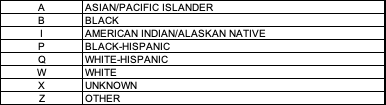

Valores únicos en 'race':
['B' 'A' 'Q' 'W' 'Z' 'P' 'U' 'I']

Distribución de registros por 'race':
race
B    6331
Q    2921
W    1117
P     671
A     364
Z     289
U      78
I      52
Name: count, dtype: int64

Porcentaje de registros por 'race':
race
B    53.55
Q    24.71
W     9.45
P     5.68
A     3.08
Z     2.44
U     0.66
I     0.44
Name: count, dtype: float64 %


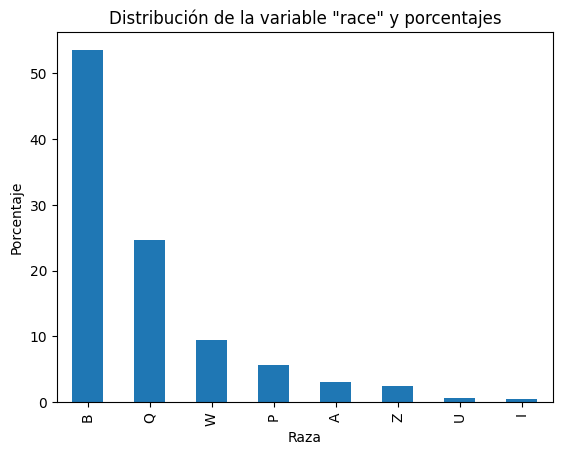

In [58]:
# Obtener valores únicos de 'race'
valores_unicos_race = df_consolidado['race'].unique()

# Contar registros para cada valor único de 'race'
cuenta_race = df_consolidado['race'].value_counts().sort_values(ascending=False)

# Calcular porcentajes
porcentaje_race = (cuenta_race / df_consolidado.shape[0]) * 100

# Mostrar resultados
print("Valores únicos en 'race':")
print(valores_unicos_race)

print("\nDistribución de registros por 'race':")
print(cuenta_race)

print("\nPorcentaje de registros por 'race':")
print(porcentaje_race.round(2), "%")

# Visualizar porcentajes en un gráfico de barras
porcentaje_race.plot(kind='bar')
plt.xlabel('Raza')
plt.ylabel('Porcentaje')
plt.title('Distribución de la variable "race" y porcentajes')
plt.show()

Como es posible observar en los datos obtenidos y en el gráfico:
El 53.55% de los registros en el conjunto de datos pertenecen a la categoría B (raza negra).
El 24.71% de los registros pertenecen a la categoría Q (raza hispano-blanca).
El 9.45% de los registros pertenecen a la categoría W (raza blanca).

Tabla de contingencia:
arstmade     N    Y
race               
A          340   24
B         5936  395
I           51    1
P          629   42
Q         2733  188
U           75    3
W         1039   78
Z          272   17


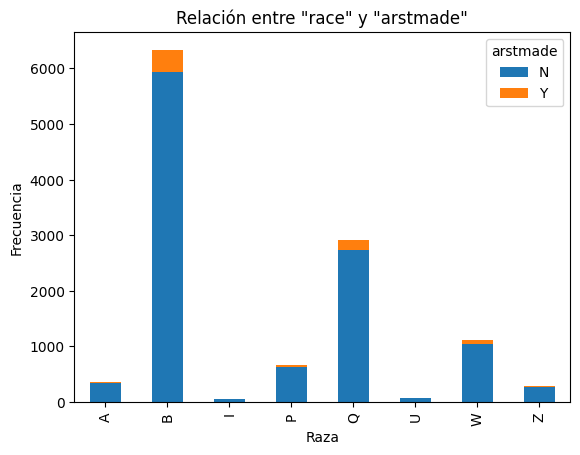

In [59]:
# Tabla de contingencia
tabla_contingencia = pd.crosstab(df_consolidado['race'], df_consolidado['arstmade'])

# Visualizar tabla de contingencia
print("Tabla de contingencia:")
print(tabla_contingencia)

# Gráfico de barras apiladas
df_consolidado.groupby(['race'])['arstmade'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Raza')
plt.ylabel('Frecuencia')
plt.title('Relación entre "race" y "arstmade"')
plt.legend(title='arstmade')
plt.show()

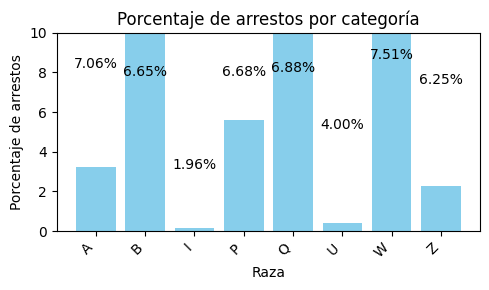

In [60]:
tabla_contingencia = pd.DataFrame({
    'race': ['A', 'B', 'I', 'P', 'Q', 'U', 'W', 'Z'],
    'N': [340, 5936, 51, 629, 2733, 75, 1039, 272],
    'Y': [24, 395, 1, 42, 188, 3, 78, 17]
})

# Calcular porcentajes positivos (Y) por categoría
porcentajes_y = (tabla_contingencia['Y'] / tabla_contingencia['Y'].sum()) * 100

# Calcular promedios de arrestos
promedios_arrestos = (tabla_contingencia['Y'] / tabla_contingencia['N']) * 100

# Calcular la moda de 'race'
moda_race = tabla_contingencia['race'].mode()[0]

# Crear gráfico de barras
plt.figure(figsize=(5, 3))  # Reducir el tamaño del gráfico a la mitad
plt.bar(tabla_contingencia['race'], porcentajes_y, color='skyblue')
plt.xlabel('Raza')
plt.ylabel('Porcentaje de arrestos')
plt.title('Porcentaje de arrestos por categoría')
plt.xticks(rotation=45, ha='right')

# Mostrar promedios encima de las barras
for i, valor in enumerate(promedios_arrestos):
    plt.text(i, valor + 1, f"{valor:.2f}%", ha='center', va='bottom', fontsize=10)

# Ajustar escala del eje Y
plt.ylim(0, 10)  # Ajustar el rango del eje Y según sea necesario

plt.tight_layout()
plt.show()


### Relación entre 'race' y 'arstmade':

Indudablemente existe una asociación entre la variable 'race' y la variable 'arstmade'.
Las personas de raza B (raza negra) tienen una mayor probabilidad de ser arrestadas que las personas de otras razas, ya que son más personas que participan en procedimientos.
Y por esta misma razón, las personas de raza A (raza asiática) tienen la menor probabilidad de ser arrestadas.


4.3 Estudie la relación de la variable respuesta en
comportamiento con la sexo (sex), comente.

Al igual que con el análisis de la variable race, procederemos en 2 pasos:
- Explorar los valores únicos en la variable 'sex': Identificar las diferentes categorías presentes en el conjunto de datos df_consolidado, y el porcentaje de registros en cada categoría.
- Analizar la relación entre 'sex' y 'arstmade': Evaluar si existe una asociación significativa entre el sexo y el resultado de los procedimientos policiales (arresto o no arresto).

Valores únicos en 'sex':
['M' 'F' 'Z']

Distribución de registros por 'sex':
sex
M    10871
F      777
Z      175
Name: count, dtype: int64

Porcentaje de registros por 'sex':
sex
M    91.95
F     6.57
Z     1.48
Name: count, dtype: float64 %


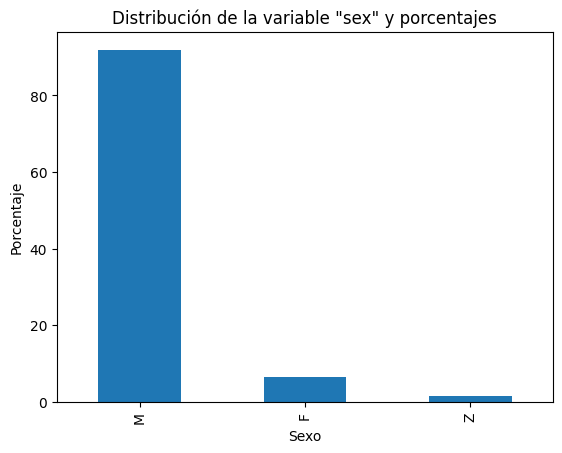

In [61]:
# Obtener valores únicos de 'sex'
valores_unicos_sex = df_consolidado['sex'].unique()

# Contar registros para cada valor único de 'sex'
cuenta_sex = df_consolidado['sex'].value_counts().sort_values(ascending=False)

# Calcular porcentajes
porcentaje_sex = (cuenta_sex / df_consolidado.shape[0]) * 100

# Mostrar resultados
print("Valores únicos en 'sex':")
print(valores_unicos_sex)

print("\nDistribución de registros por 'sex':")
print(cuenta_sex)

print("\nPorcentaje de registros por 'sex':")
print(porcentaje_sex.round(2), "%")

# Visualizar porcentajes en un gráfico de barras
porcentaje_sex.plot(kind='bar')
plt.xlabel('Sexo')
plt.ylabel('Porcentaje')
plt.title('Distribución de la variable "sex" y porcentajes')
plt.show()

Como es posible observar en los datos obtenidos y en el gráfico: El 91.95% de los registros en el conjunto de datos pertenecen a la categoría M (Masculino). El 6.57% de los registros pertenecen a la categoría F (Femenino), y el 1.48% de los registros pertenecen a la Z (desconocido).

Tabla de contingencia:
arstmade      N    Y
sex                 
F           702   75
M         10206  665
Z           167    8


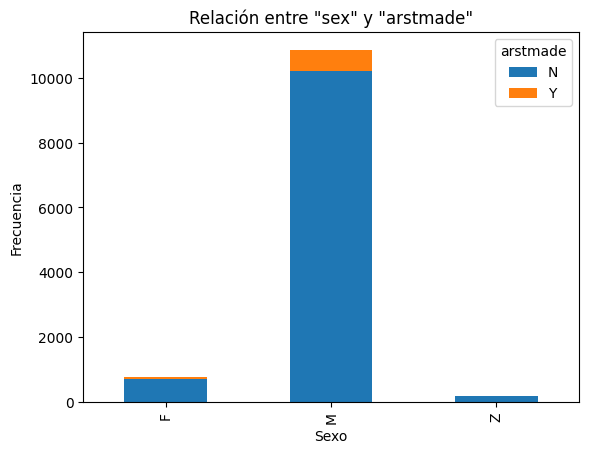

In [62]:
# Tabla de contingencia
tabla_contingencia = pd.crosstab(df_consolidado['sex'], df_consolidado['arstmade'])

# Visualizar tabla de contingencia
print("Tabla de contingencia:")
print(tabla_contingencia)

# Gráfico de barras apiladas
df_consolidado.groupby(['sex'])['arstmade'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.title('Relación entre "sex" y "arstmade"')
plt.legend(title='arstmade')
plt.show()

In [63]:
# Calcular el total de 'N' y 'Y'
total_n = tabla_contingencia['N'].sum()
total_y = tabla_contingencia['Y'].sum()

# Agregar columna 'Porcentaje de arresto'
tabla_contingencia['Porcentaje de arresto'] = (tabla_contingencia['Y'] / total_y) * 100

# Visualizar tabla de contingencia
print("Tabla de contingencia:")
print(tabla_contingencia)

Tabla de contingencia:
arstmade      N    Y  Porcentaje de arresto
sex                                        
F           702   75              10.026738
M         10206  665              88.903743
Z           167    8               1.069519


A partir de la tabla de contingencia y los porcentajes de arresto, se pueden realizar las siguientes conclusiones:

- Desigualdad en las tasas de arresto por género:

Se observa una desigualdad significativa en las tasas de arresto por género.
El género "M" presenta un porcentaje de arresto mucho mayor (88.90%) que los géneros "F" (10.03%) y "Z" (1.07%).
Esta diferencia en las tasas de arresto podría indicar posibles sesgos o discriminación en el sistema de justicia penal en lo que respecta a los géneros.
- Género "M" con mayor riesgo de arresto:

Los individuos del género "M" tienen un riesgo significativamente mayor de ser arrestados en comparación con los géneros "F" y "Z".
Esta información podría ser útil para comprender las experiencias y los desafíos que enfrentan los individuos de diferentes géneros en el contexto del sistema de justicia penal.
- Necesidad de análisis más profundo:

Es importante destacar que estas conclusiones se basan en una descripción simple de los datos y no se pueden realizar inferencias estadísticas sin un análisis más profundo.
Se recomienda realizar pruebas estadísticas como la prueba chi-cuadrado para confirmar la significancia estadística de las diferencias en las tasas de arresto entre géneros.
También es importante considerar el contexto social, cultural y legal en el que se recopilaron los datos para comprender mejor las posibles causas de las desigualdades observadas.

4.3-b  Estudie la relación de la variable respuesta en
comportamiento con la sexo y la edad en su conjunto, comente.

Paso 1: Detección y eliminación de outliers (valores atípicos)

In [64]:
df = df_consolidado

print(df['age'].describe())
df_clean = df[(df['age'] >= 1) & (df['age'] <= 100) | (df['age'] == 'U')]
print(df_clean['age'].describe())


count    11823.000000
mean        28.968113
std         29.207277
min          1.000000
25%         19.000000
50%         25.000000
75%         34.000000
max        999.000000
Name: age, dtype: float64
count    11797.000000
mean        28.005679
std         11.671243
min          1.000000
25%         19.000000
50%         24.000000
75%         34.000000
max        100.000000
Name: age, dtype: float64


Paso 2: Análisis descriptivo de la distribución de 'age'

- Gráfico de distribución de frecuencias:

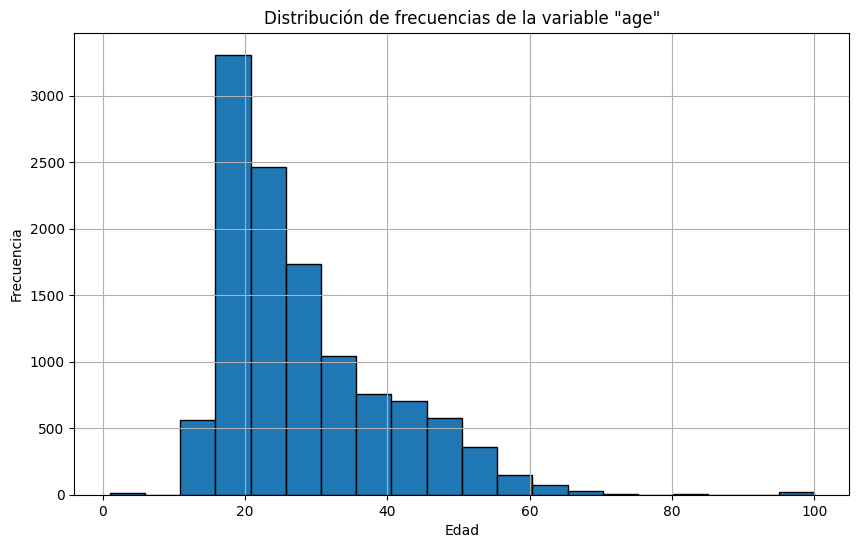

In [65]:
# Crear histograma de 'age'
plt.figure(figsize=(10, 6))
plt.hist(df_clean['age'], bins=20, edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de frecuencias de la variable "age"')
plt.grid(True)
plt.show()


- Conclusiones sobre la distribución de 'age':

A partir del histograma proporcionado, podemos realizar las siguientes conclusiones estadísticas sobre la distribución de la variable 'age':

La distribución de 'age' no es simétrica. Se observa una curtosis positiva, lo que indica que la distribución tiene una cola derecha más larga que la izquierda.
La moda de la distribución se encuentra en el rango de 18 a 20 años, lo que significa que este es el grupo de edad con mayor frecuencia en el conjunto de datos.
La distribución decrece gradualmente a medida que aumenta la edad, lo que sugiere que hay menos individuos en los grupos de edad más altos.

- Relación entre 'age', 'sex' y 'arstmade'

Ahora revisemos la distribución de 'arstmade' en función de 'age' y 'sex', mediante un gráfico.

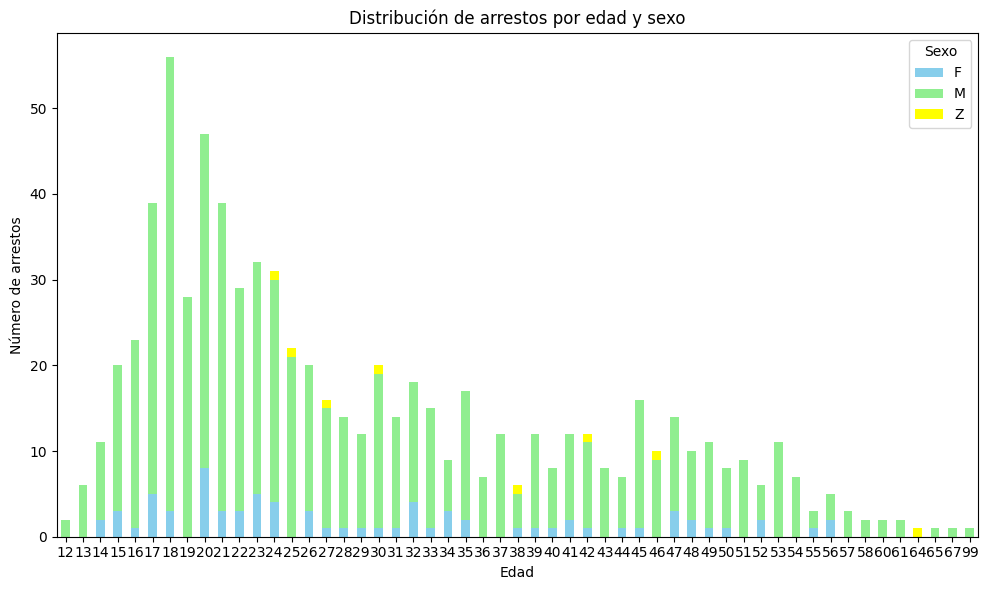

In [66]:
df_arrestos = df_clean[df_clean['arstmade'] == 'Y']  # Filtrar solo casos de arrestos

tabla_contingencia = pd.crosstab(df_arrestos['age'], [df_arrestos['sex']])
tabla_contingencia.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'yellow'], figsize=(10, 6))
plt.xlabel('Edad')
plt.ylabel('Número de arrestos')
plt.title('Distribución de arrestos por edad y sexo')
plt.xticks(rotation=0)  # Rotar etiquetas de eje X para mejor visibilidad
plt.legend(title='Sexo', labels=['F', 'M', 'Z'])
plt.tight_layout()
plt.show()


Conclusiones de la distribución de arrestos por edad y sexo:
- En el gráfico, se observa que la frecuencia de arrestos es siempre mayor en el sexo masculino (M) en todos los grupos de edad.
- La diferencia en la frecuencia de arrestos entre 'F' y 'M' es relativamente proporcional, donde por ejemplo en los grupos de edad más jóvenes, la cantidad de arrestos de mujeres también aumenta.
- Se observa un pico en la frecuencia de arrestos para el sexo masculino en el grupo de edad de 18 a 20 años, por cuanto el pico de arrestos de mujeres está en los 20 años.

4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y.

In [67]:
df_clean['arstmade'] = df_clean['arstmade'].map({'Y': 1, 'N': 0})
#Luego de realizado el cambio, verificamos las categorías de arstmade
df_clean['arstmade'].dtype
df_clean['arstmade'].head()


0    0
1    0
2    0
3    0
4    0
Name: arstmade, dtype: int64

4.5 Muestre en un gráfico la probabilidad que un individuo sea arrestado, condicional al género y a la raza. ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?.

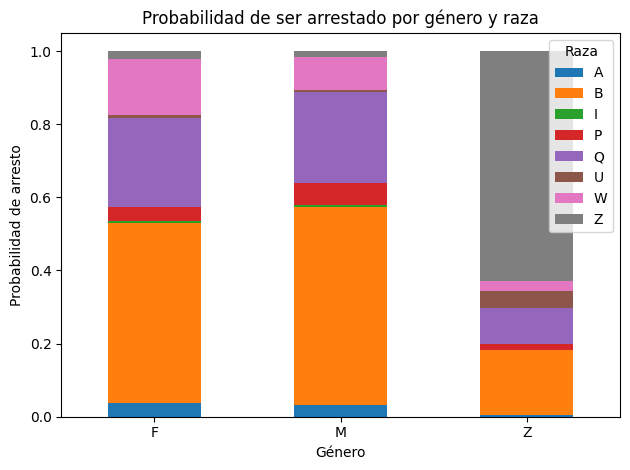

In [68]:

# Calcula el número total de arrestos por género y raza
arrestos_por_genero_y_raza = df_clean.groupby(['sex', 'race']).size().unstack()

# Calcula el número de arrestos por género
arrestos_por_genero = df_clean.groupby('sex').size()

# Calcula la probabilidad condicional de ser arrestado dado el género y la raza
prob_arresto_condicional = arrestos_por_genero_y_raza.div(arrestos_por_genero, axis=0)

# Grafica la probabilidad condicional de ser arrestado
prob_arresto_condicional.plot(kind='bar', stacked=True)
plt.title('Probabilidad de ser arrestado por género y raza')
plt.xlabel('Género')
plt.ylabel('Probabilidad de arresto')
plt.legend(title='Raza')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Conclusión ética



El análisis muestra las probabilidades de ser arrestado según el género y la raza.
Como es posible apreciar, destaca la disparidad en las probabilidades de arresto entre diferentes grupos, y especificamente los sujetos que tienen mucha más probabilidad de terminar en arresto, son las personas de raza negra en primer lugar, y de raza blanca-hispanica (es decir latinos) en segundo lugar.
Por otro lado, el género no marca una diferencia tan significativa como la raza, donde es posible apreciar que los hombres solo tienen un pequeño porcentaje superior de probabilidades de arresto por sobre las mujeres.
Lamentablemente, y como conclusión ética, estas disparidades podrían indicar posibles sesgos o derechamente discriminación racial en el sistema policial.

### 5.- Determinar si el procedimiento policial concluirá en alguna acción violenta.

Los atributos que tienen el prefijo pf (['pf_hands'],['pf_wall'], ['pf_grnd'],
['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y
['pf_other']) indican si hubo fuerza fisica utilizada por el oficial al
momento del procedimiento, con la marca 'Y'.
Genere una nueva variable llamada 'violencia' la cual sea 1 si en
cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego
indique el porcentaje de casos que terminaron con violencia.

In [69]:
# Crear la nueva variable 'violencia'
df_clean['violencia'] = (df_clean[['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other']] == 'Y').any(axis=1).astype(int)

# Calcular el porcentaje de casos que terminaron con violencia
porcentaje_violencia = (df_clean['violencia'].sum() / len(df_clean)) * 100

print(f"El {porcentaje_violencia:.2f}% de los casos terminaron con violencia.")


El 24.58% de los casos terminaron con violencia.


### 6.- Modelación

6.1 Genere las variables dummies correspondientes (Tenga
cuidado de no utilizar variables que expliquen lo mismo,
¡recuerde que acaba de crear una variable a partir de otras!, además recuerde que creó una variable numérica que es una categoría :) ). Luego genere los sets de train-test utilizando el año 2009 para entrenar, y el año 2010 para testear.

In [70]:
# Crear variables dummies
df_dummies = pd.get_dummies(df_clean.drop(columns=['violencia', 'year']), drop_first=True)

# Concatenar las variables dummies con el DataFrame original
df_final = pd.concat([df_clean[['violencia', 'year']], df_dummies], axis=1)

# Dividir el conjunto de datos en sets de train-test
df_train = df_final[df_final['year'] == 2009].drop(columns=['year'])
df_test = df_final[df_final['year'] == 2010].drop(columns=['year'])

# Separar las características (X) y la variable objetivo (y)
X_train = df_train.drop(columns=['violencia'])
y_train = df_train['violencia']
X_test = df_test.drop(columns=['violencia'])
y_test = df_test['violencia']


6.2 Entrene 4 modelos de clásificación y reporte el mejor modelo bajo algún criterio.

Utilice validación cruzada de al menos 2 folds
para probar distintos hiperparámetros para cada modelo (puede probar cualquier hiperparámetro, pero debe ser al menos uno).

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Definir los modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Realizar validación cruzada para cada modelo y seleccionar el mejor
best_model = None
best_score = 0

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=2)
    mean_score = scores.mean()
    print(f"{name}: Mean Accuracy = {mean_score}")

    if mean_score > best_score:
        best_model = model
        best_score = mean_score

print(f"\nMejor modelo: {best_model}")
print(f"Puntaje del mejor modelo: {best_score}")


Logistic Regression: Mean Accuracy = 0.7500861771802827
Decision Tree: Mean Accuracy = 0.9981041020337815
Random Forest: Mean Accuracy = 0.869010685970355
Support Vector Machine: Mean Accuracy = 0.7500861771802827

Mejor modelo: DecisionTreeClassifier()
Puntaje del mejor modelo: 0.9981041020337815


Basado en los resultados de la validación cruzada con 2 folds para los cuatro modelos de clasificación probados, la precisión media más alta se obtuvo con el modelo de Árbol de Decisión, con un puntaje de precisión promedio de aproximadamente 0.998. Esto significa que, en promedio, el modelo de Árbol de Decisión logró clasificar correctamente alrededor del 99.8% de las muestras en el conjunto de datos de entrenamiento.

La Regresión Logística y la Máquina de Vectores de Soporte (SVM) obtuvieron la misma precisión media de alrededor del 75%, mientras que el modelo de Bosques Aleatorios logró una precisión media de alrededor del 87%.

Por lo tanto, bajo el criterio de precisión media, el modelo de Árbol de Decisión fue identificado como el mejor modelo para este problema de clasificación. Sin embargo, es importante tener en cuenta que la precisión no es el único criterio a considerar al seleccionar un modelo, y otros factores como la interpretabilidad del modelo, el tiempo de entrenamiento y la capacidad de generalización también pueden ser importantes dependiendo del contexto de la aplicación.